<a href="https://colab.research.google.com/github/ryannovianno9/Garment-Productivity-Classification/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
!pip install feature_engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.6/378.6 kB 8.5 MB/s eta 0:00:00


In [ ]:
!pip install scikit-learn==1.0.2

ERROR: Operation cancelled by user


# Data Collection and Data Understanding

## Data Collection

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset link: https://drive.google.com/drive/folders/13M0Z9Zzz_NJGrYrUD4qWVRxim2f_OTZ8

## Problem

Imagine you are a Data Scientist at a company engaged in the garment industry. You are asked by the CEO of the company to predict the effectiveness of labor.Because most of the processes in his factory are still done manually (human labor has a large portion compared to machines), it is important for him to know how effective and efficient the performance of his workers so that he can make certain interventions if the effectiveness of their performance starts to fall and provide incentives if their performance is good and stable.

## Import Library

In [5]:
!pip install yellowbrick
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score

## Data Understanding

In [6]:
df = pd.read_csv('/content/drive/MyDrive/garments_worker_productivity.csv')
df.shape

(1197, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [8]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [9]:
dict(df.dtypes)

{'date': dtype('O'),
 'quarter': dtype('O'),
 'department': dtype('O'),
 'day': dtype('O'),
 'team': dtype('int64'),
 'targeted_productivity': dtype('float64'),
 'smv': dtype('float64'),
 'wip': dtype('float64'),
 'over_time': dtype('int64'),
 'incentive': dtype('int64'),
 'idle_time': dtype('float64'),
 'idle_men': dtype('int64'),
 'no_of_style_change': dtype('int64'),
 'no_of_workers': dtype('float64'),
 'actual_productivity': dtype('float64')}

In [10]:
df.isna().sum()

,0
date,0
quarter,0
department,0
day,0
team,0
targeted_productivity,0
smv,0
wip,506
over_time,0
incentive,0


In [11]:
df.isna()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1193,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1194,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1195,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
for col in df.columns:
    print(f'{col}: {df[col].unique()}')

date: ['1/1/2015' '1/3/2015' '1/4/2015' '1/5/2015' '1/6/2015' '1/7/2015'
 '1/8/2015' '1/10/2015' '1/11/2015' '1/12/2015' '1/13/2015' '1/14/2015'
 '1/15/2015' '1/17/2015' '1/18/2015' '1/19/2015' '1/20/2015' '1/21/2015'
 '1/22/2015' '1/24/2015' '1/25/2015' '1/26/2015' '1/27/2015' '1/28/2015'
 '1/29/2015' '1/31/2015' '2/1/2015' '2/2/2015' '2/3/2015' '2/4/2015'
 '2/5/2015' '2/7/2015' '2/8/2015' '2/9/2015' '2/10/2015' '2/11/2015'
 '2/12/2015' '2/14/2015' '2/15/2015' '2/16/2015' '2/17/2015' '2/18/2015'
 '2/19/2015' '2/22/2015' '2/23/2015' '2/24/2015' '2/25/2015' '2/26/2015'
 '2/28/2015' '3/1/2015' '3/2/2015' '3/3/2015' '3/4/2015' '3/5/2015'
 '3/7/2015' '3/8/2015' '3/9/2015' '3/10/2015' '3/11/2015']
quarter: ['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']
department: ['sweing' 'finishing ' 'finishing']
day: ['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']
team: [ 8  1 11 12  6  7  2  3  9 10  5  4]
targeted_productivity: [0.8  0.75 0.7  0.65 0.6  0.35 0.5  0.07 0.4 ]
s

# Data Cleaning

<Axes: >

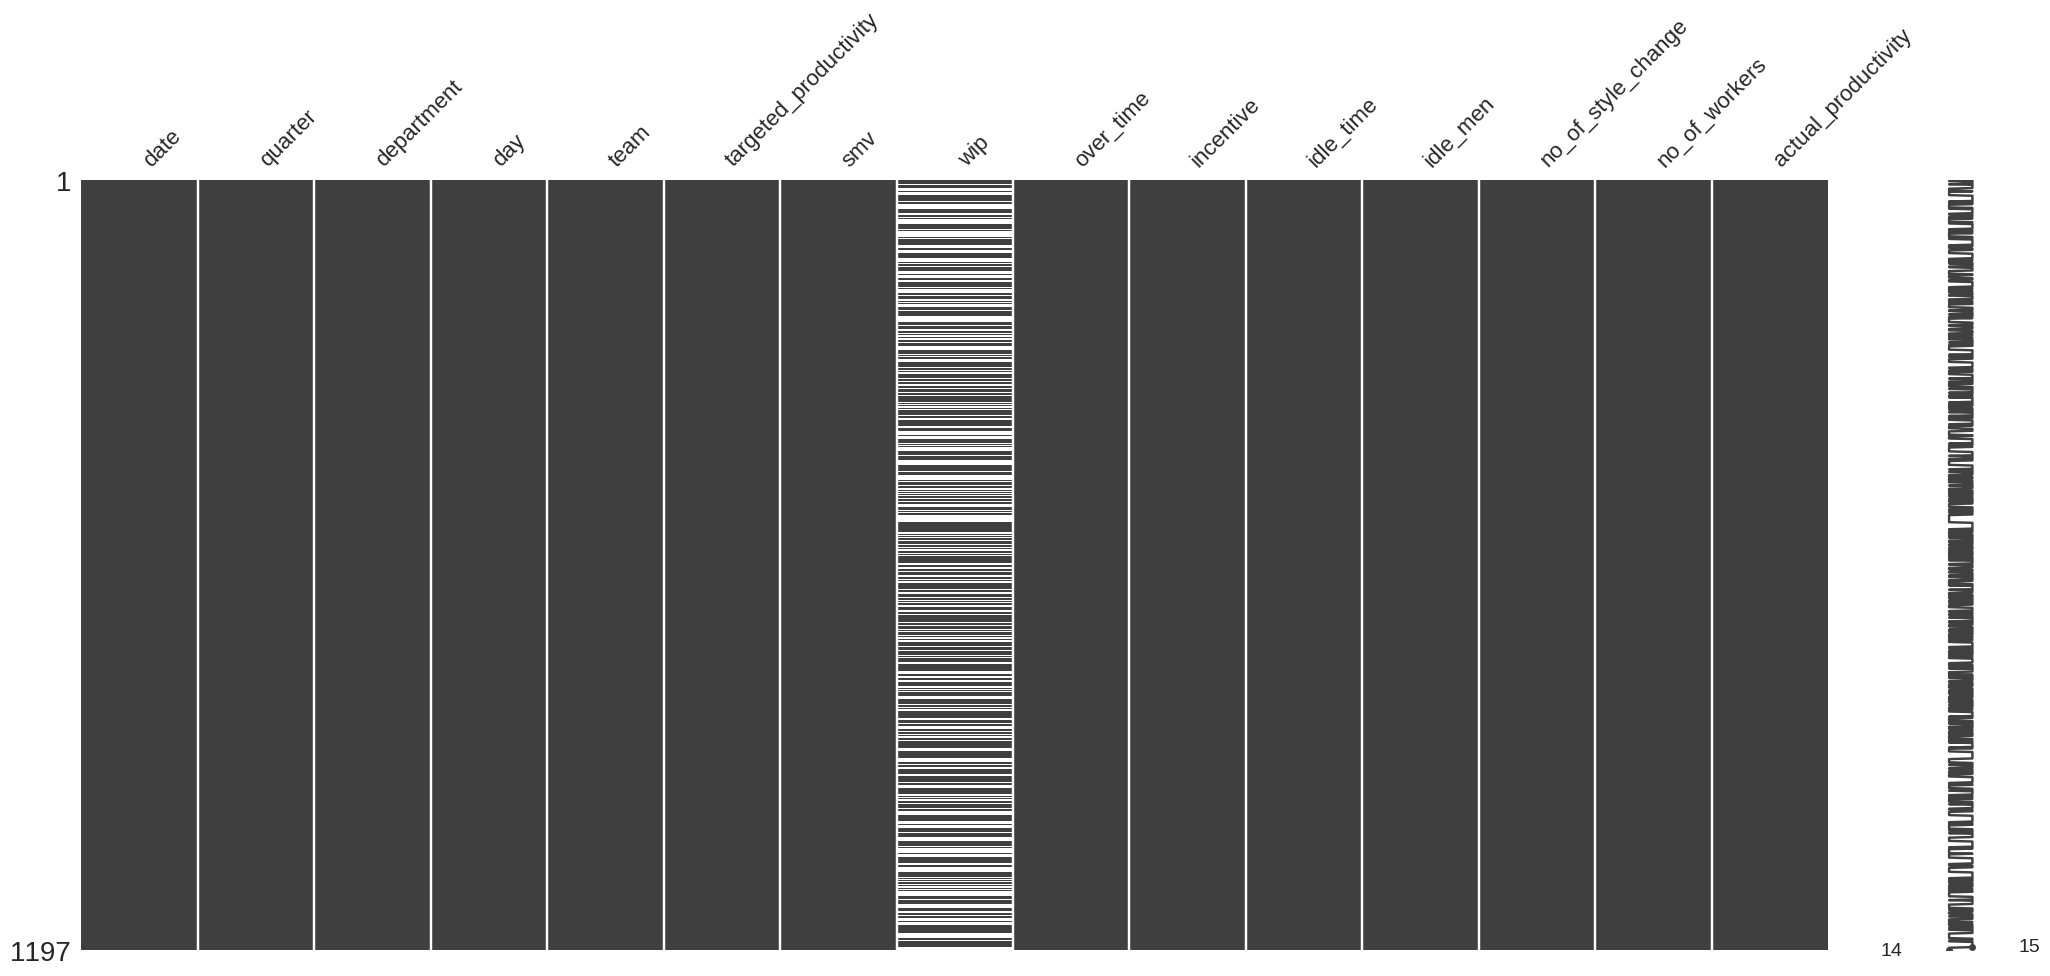

In [14]:
import missingno as msno

msno.matrix(df)  # just to visualize. no missing value.

In [15]:
missing_percentage = df.isnull().sum() * 100 / len(df)
missing_percentage

,0
date,0.000000
quarter,0.000000
department,0.000000
day,0.000000
team,0.000000
targeted_productivity,0.000000
smv,0.000000
wip,42.272348
over_time,0.000000
incentive,0.000000


In [16]:
df['date'] = pd.to_datetime(df['date'])
df['department'] = df['department'].replace('sweing','sewing')
df['department'] = df['department'].replace('finishing ', 'finishing')

df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,2015-01-01,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,2015-01-01,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,2015-01-01,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [17]:
num_cols = [i for i in df.columns if df[i].dtypes != 'object' and i not in ['no_of_style_change','date','team']]
cat_cols = [i for i in df.columns if df[i].dtypes == 'object' or i in ['no_of_style_change','team']]

print(num_cols)
print(cat_cols)

['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_workers', 'actual_productivity']
['quarter', 'department', 'day', 'team', 'no_of_style_change']


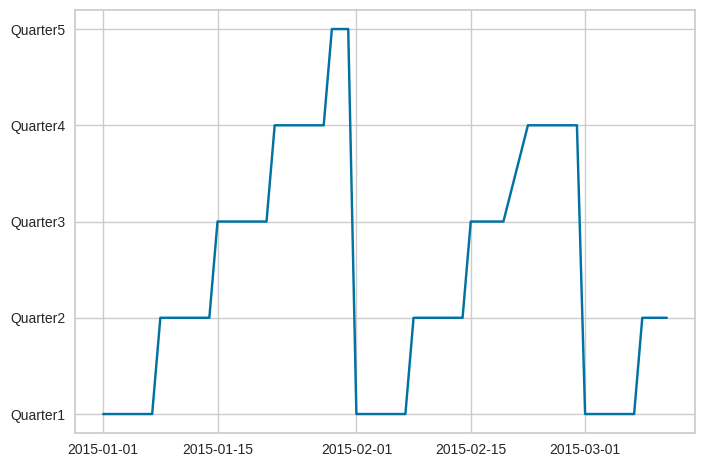

In [18]:
plt.plot(df['date'], df['quarter'])
plt.show()

In [19]:
df['quarter'] = df['quarter'].replace('Quarter5','Quarter4')
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,2015-01-01,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,2015-01-01,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,2015-01-01,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


# EDA

In [20]:
df.describe()

,date,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,2015-02-04 10:56:50.526315776,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
min,2015-01-01 00:00:00,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,2015-01-18 00:00:00,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,2015-02-03 00:00:00,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,2015-02-23 00:00:00,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,2015-03-11 00:00:00,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437
std,NaN,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   object        
 2   department             1197 non-null   object        
 3   day                    1197 non-null   object        
 4   team                   1197 non-null   int64         
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    691 non-null    float64       
 8   over_time              1197 non-null   int64         
 9   incentive              1197 non-null   int64         
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   int64         
 13  no_

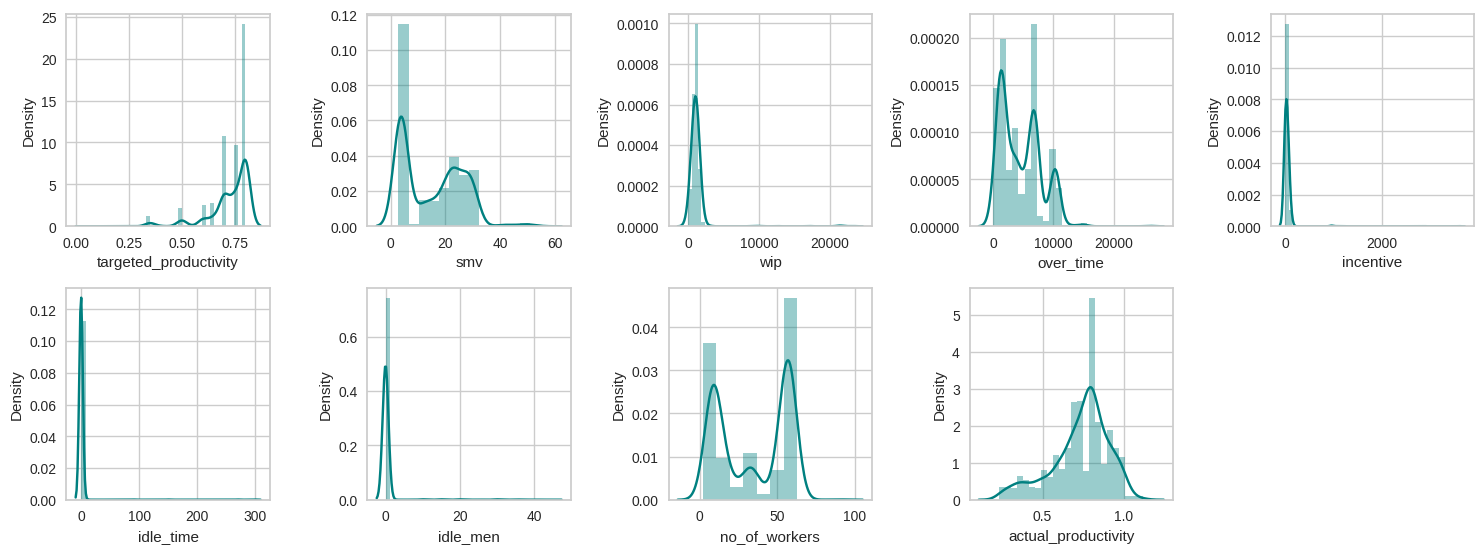

In [22]:
plt.figure(figsize=(15,8))
for i in range(0, len(num_cols)):
    plt.subplot(3, 5, i+1)
    sns.distplot(df[num_cols[i]], color='teal')
    plt.tight_layout()

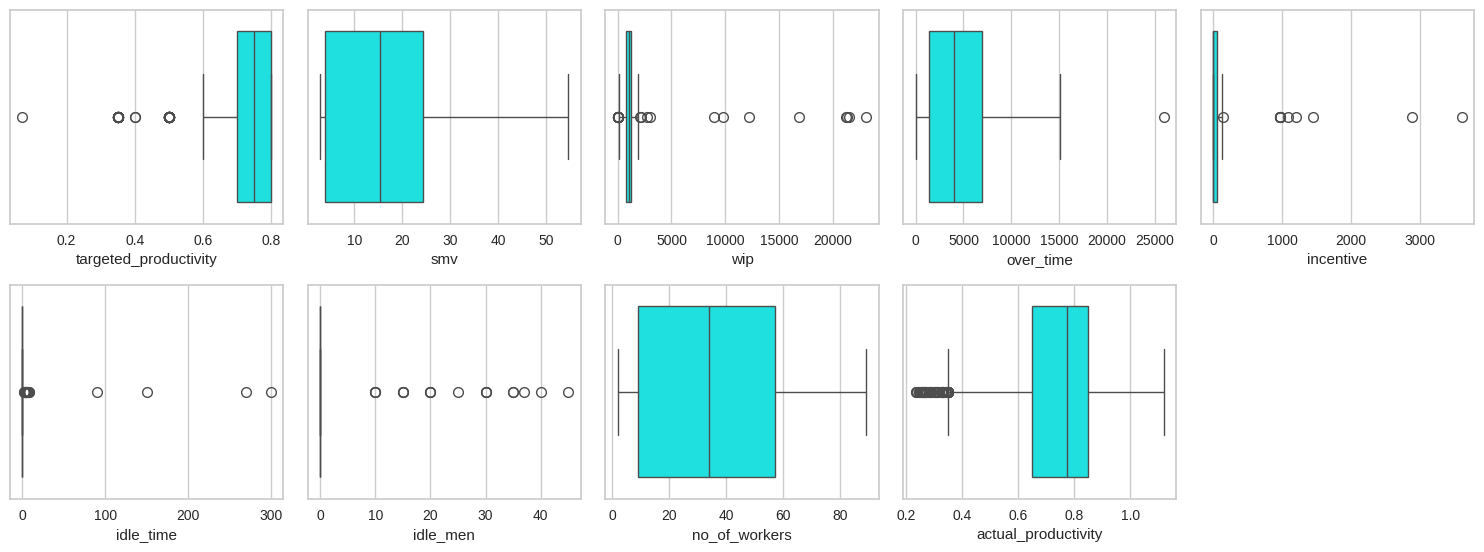

In [23]:
plt.figure(figsize=(15,8))
for i in range(0, len(num_cols)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(x=df[num_cols[i]], color='cyan', orient='v')
    plt.tight_layout()

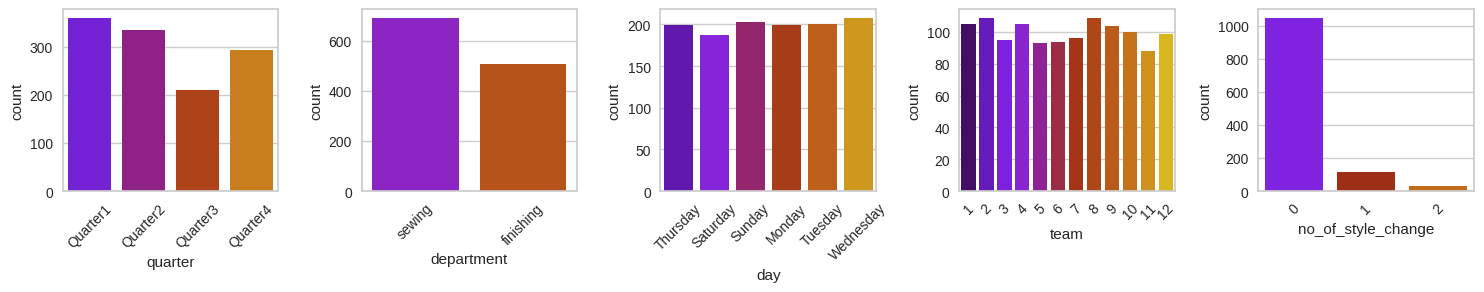

In [24]:
plt.figure(figsize=(15,8))
for i in range(0, len(cat_cols)):
    plt.subplot(3, 5, i+1)
    sns.countplot(x=df[cat_cols[i]], data=df, palette='gnuplot')
    plt.xticks(rotation=45)
    plt.tight_layout()

<Axes: >

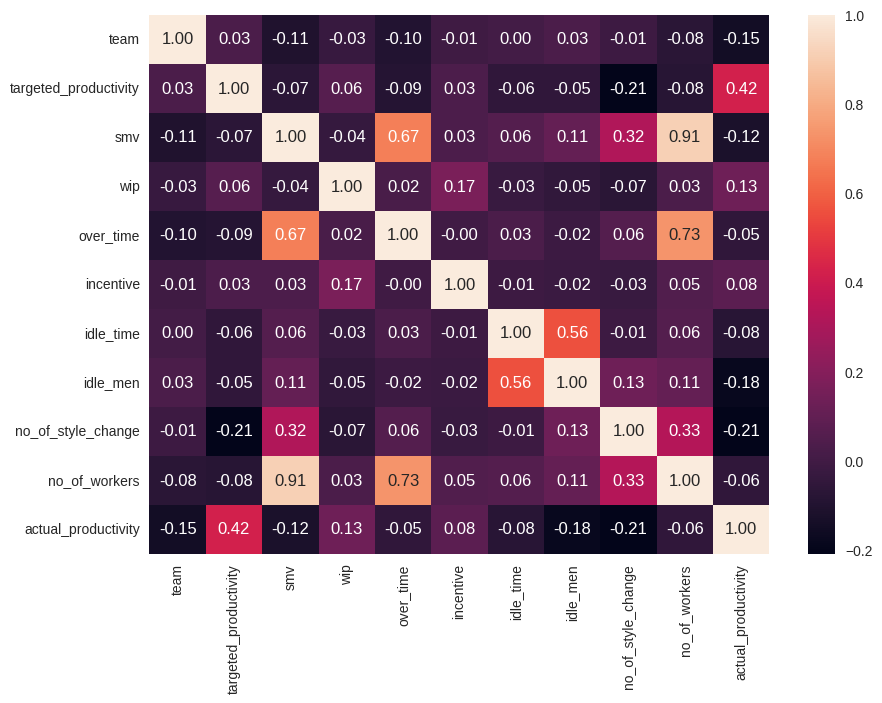

In [25]:
# Correlation
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f')

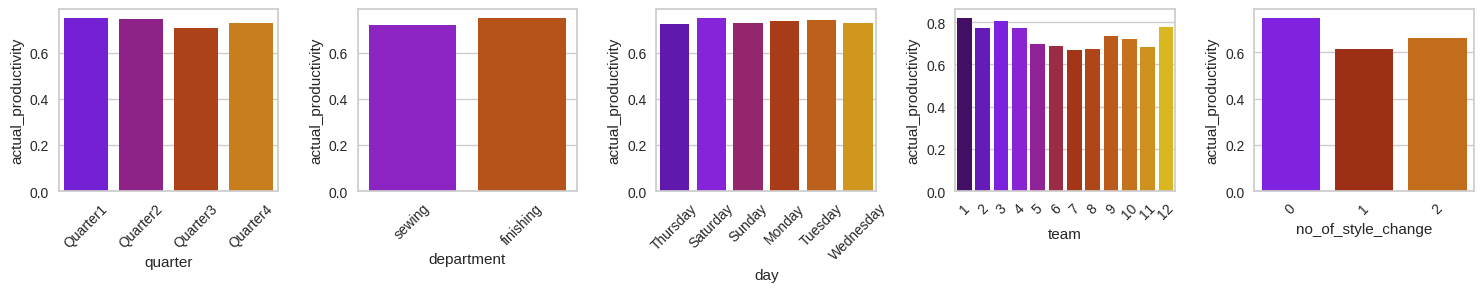

In [26]:
plt.figure(figsize=(15,8))
for i in range(0, len(cat_cols)):
    plt.subplot(3, 5, i+1)
    sns.barplot(x=cat_cols[i], y='actual_productivity', data=df,palette='gnuplot',ci=None)
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

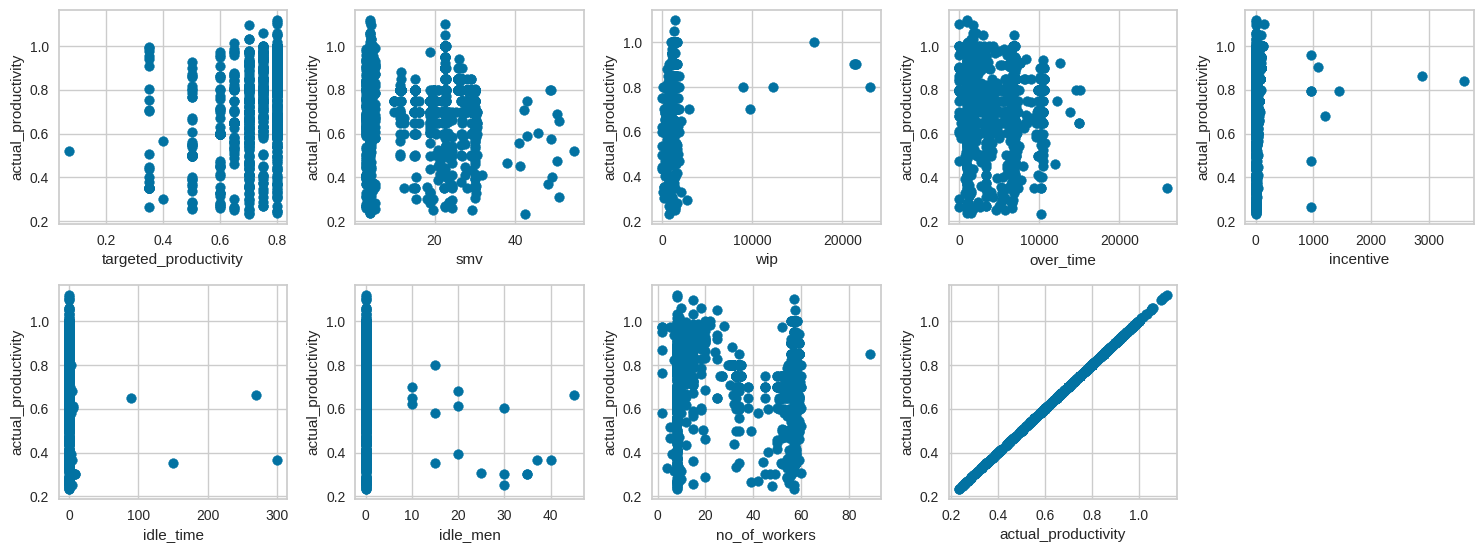

In [27]:
plt.figure(figsize=(15,8))
for i in range(0, len(num_cols)):
    plt.subplot(3, 5, i+1)
    plt.scatter(df[num_cols[i]], df['actual_productivity'])
    plt.xlabel(num_cols[i])
    plt.ylabel('actual_productivity')
    plt.tight_layout()

plt.show()

# Modelling and Evaluation

In [28]:
df2 = df.copy()

In [29]:
df2.drop(columns=['date','wip'], inplace=True)

In [30]:
def categorize_productivity(value):
    if value <= 0.33:
        return 'Low'
    elif value <= 0.66:
        return 'Medium'
    else:
        return 'High'

# Menerapkan fungsi categorize_productivity ke kolom actual_productivity
df2['productivity_category'] = df2['actual_productivity'].apply(categorize_productivity)

df2['productivity_category']

,productivity_category
0,High
1,High
2,High
3,High
4,High
...,...
1192,Medium
1193,Medium
1194,Medium
1195,Medium


In [31]:
le= LabelEncoder()
df2["department"] = le.fit_transform(df2["department"])
df2["quarter"] = le.fit_transform(df2["quarter"])
df2["day"] = le.fit_transform(df2["day"])
df2["productivity_category"] = le.fit_transform(df2["productivity_category"])

In [32]:
df2['productivity_category'].value_counts()

,count
productivity_category,
0,881
2,277
1,39


In [33]:
df2.head()

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,productivity_category
0,0,1,3,8,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725,0
1,0,0,3,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500,0
2,0,1,3,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,0
3,0,1,3,12,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,0
4,0,1,3,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382,0


In [34]:
X = df2.drop(columns=['productivity_category','actual_productivity'])
y = df2['productivity_category']

In [37]:
from feature_engine.outliers import Winsorizer

# Buat Winsorizer
windsoriser = Winsorizer(capping_method='iqr', # pilih 'iqr' untuk batas aturan IQR atau 'gaussian' untuk mean dan std
                          tail='both',
                          fold=1.5,
                          variables=['incentive', 'over_time'])

windsoriser.fit(X)

# Transformasikan data
X = windsoriser.transform(X)

In [ ]:
#Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-1.18574131,  0.85572897,  0.27151595, ..., -0.11300466,
        -0.3516175 ,  1.0992288 ],
       [-1.18574131, -1.1685943 ,  0.27151595, ..., -0.11300466,
        -0.3516175 , -1.19926822],
       [-1.18574131,  0.85572897,  0.27151595, ..., -0.11300466,
        -0.3516175 , -0.18522542],
       ...,
       [-0.31551915, -1.1685943 ,  1.43849833, ..., -0.11300466,
        -0.3516175 , -1.19926822],
       [-0.31551915, -1.1685943 ,  1.43849833, ..., -0.11300466,
        -0.3516175 , -0.88378824],
       [-0.31551915, -1.1685943 ,  1.43849833, ..., -0.11300466,
        -0.3516175 , -1.28940536]])

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model KNeighbors Classifier
Cross Validation accuracy:  0.7471313263525305
Test Accuracy:  0.7625
Mean Squared Error: 0.8125
Root Mean Squared Error: 0.9013878188659973
Symmetric Mean Absolute Percentage Error: 69.65811965811966

Confusion Matrix:


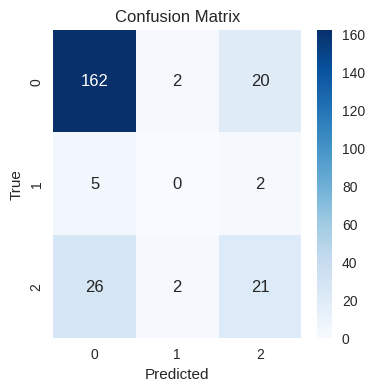


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       184
           1       0.00      0.00      0.00         7
           2       0.49      0.43      0.46        49

    accuracy                           0.76       240
   macro avg       0.44      0.44      0.44       240
weighted avg       0.74      0.76      0.75       240


Model Support Vector Machine
Cross Validation accuracy:  0.7283158813263525
Test Accuracy:  0.7666666666666667
Mean Squared Error: 0.8458333333333333
Root Mean Squared Error: 0.9196919774214263
Symmetric Mean Absolute Percentage Error: 100.0

Confusion Matrix:


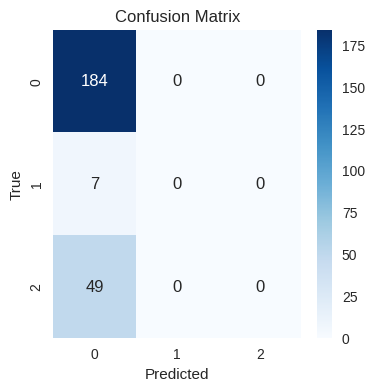


Classification Report:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       184
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00        49

    accuracy                           0.77       240
   macro avg       0.26      0.33      0.29       240
weighted avg       0.59      0.77      0.67       240


Model Naive Bayes Classifier
Cross Validation accuracy:  0.7293630017452006
Test Accuracy:  0.7625
Mean Squared Error: 0.8375
Root Mean Squared Error: 0.9151502608861564
Symmetric Mean Absolute Percentage Error: 97.1264367816092

Confusion Matrix:


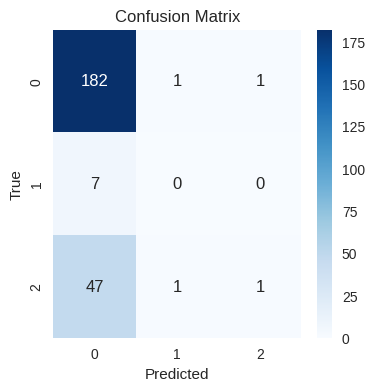


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.99      0.87       184
           1       0.00      0.00      0.00         7
           2       0.50      0.02      0.04        49

    accuracy                           0.76       240
   macro avg       0.42      0.34      0.30       240
weighted avg       0.69      0.76      0.67       240


Model Random Forest Classifier
Cross Validation accuracy:  0.8317462914485165
Test Accuracy:  0.8291666666666667
Mean Squared Error: 0.6083333333333333
Root Mean Squared Error: 0.779957263786506
Symmetric Mean Absolute Percentage Error: 52.702702702702695

Confusion Matrix:


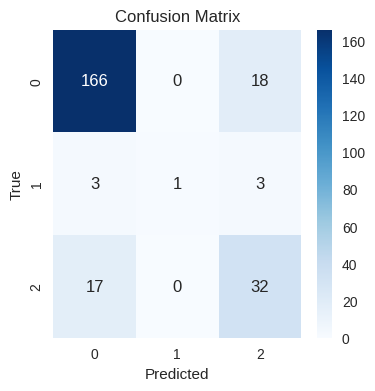


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       184
           1       1.00      0.14      0.25         7
           2       0.60      0.65      0.63        49

    accuracy                           0.83       240
   macro avg       0.83      0.57      0.59       240
weighted avg       0.84      0.83      0.82       240


Model Decision Tree Classifier
Cross Validation accuracy:  0.774301919720768
Test Accuracy:  0.7916666666666666
Mean Squared Error: 0.7458333333333333
Root Mean Squared Error: 0.8636164272021076
Symmetric Mean Absolute Percentage Error: 57.028112449799195

Confusion Matrix:


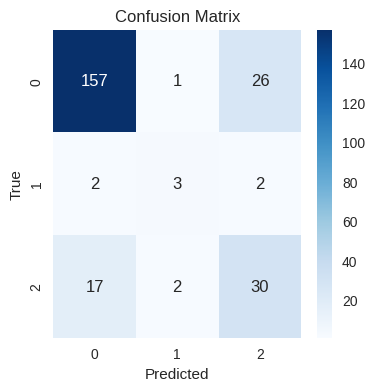


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       184
           1       0.50      0.43      0.46         7
           2       0.52      0.61      0.56        49

    accuracy                           0.79       240
   macro avg       0.64      0.63      0.63       240
weighted avg       0.80      0.79      0.80       240


Model Logistic Regression
Cross Validation accuracy:  0.7356020942408377
Test Accuracy:  0.8
Mean Squared Error: 0.7125
Root Mean Squared Error: 0.8440971508067067
Symmetric Mean Absolute Percentage Error: 69.65174129353234

Confusion Matrix:


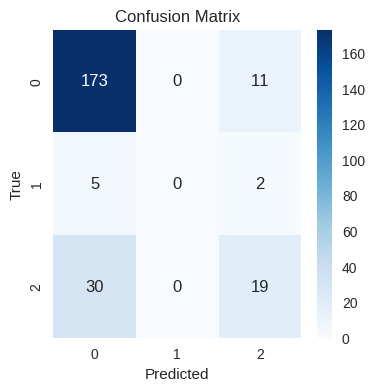


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       184
           1       0.00      0.00      0.00         7
           2       0.59      0.39      0.47        49

    accuracy                           0.80       240
   macro avg       0.48      0.44      0.45       240
weighted avg       0.76      0.80      0.77       240


Model Multilayer Perceptron
Cross Validation accuracy:  0.6790903141361258
Test Accuracy:  0.2875
Mean Squared Error: 0.8125
Root Mean Squared Error: 0.9013878188659973
Symmetric Mean Absolute Percentage Error: 81.00558659217877

Confusion Matrix:


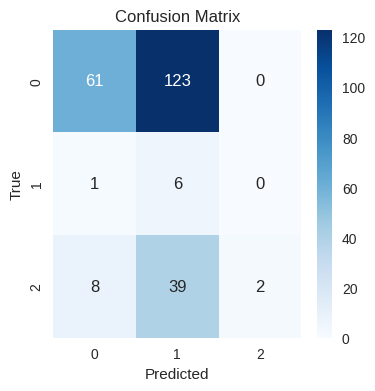


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.33      0.48       184
           1       0.04      0.86      0.07         7
           2       1.00      0.04      0.08        49

    accuracy                           0.29       240
   macro avg       0.64      0.41      0.21       240
weighted avg       0.87      0.29      0.39       240


Best Model:  Pipeline(steps=[('model', RandomForestClassifier(random_state=42))])
                      Model  Cross Validation Accuracy  Test Accuracy  \
0     KNeighbors Classifier                   0.747131       0.762500   
1    Support Vector Machine                   0.728316       0.766667   
2    Naive Bayes Classifier                   0.729363       0.762500   
3  Random Forest Classifier                   0.831746       0.829167   
4  Decision Tree Classifier                   0.774302       0.791667   
5       Logistic Regression                   0.735602       0.800000   
6

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

results1 = []
initial_rmse = {}
initial_smape = {}



models = [
    ('KNeighbors Classifier', KNeighborsClassifier()),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Naive Bayes Classifier', GaussianNB()),
    ('Random Forest Classifier', RandomForestClassifier(random_state=42)),
    ('Decision Tree Classifier', DecisionTreeClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Multilayer Perceptron', MLPClassifier(random_state=42))


]

best_model = None
best_accuracy = 0.0

#Iterate over the models and evaluate their performance
for name, model in models:
    #create a pipeline for each model
    pipeline = Pipeline([
        ('model', model)
    ])

    # perform cross validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)

    # Calculate mean accuracy
    mean_accuracy = scores.mean()

    #fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # make prediction on the test data
    y_pred = pipeline.predict(X_test)

    #Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    #calculate MSE
    mse = mean_squared_error(y_test, y_pred)

    #calculate RSME
    rmse = np.sqrt(mse)
    initial_rmse[name] = rmse

    #calculate SMAPE
    smape = np.mean(np.abs(y_test - y_pred) / (np.abs(y_test) + np.abs(y_pred))) * 100
    initial_smape[name] = smape

    results1.append([name, mean_accuracy, accuracy, rmse, smape])

    #print the performance metrics
    print("Model", name)
    print("Cross Validation accuracy: ", mean_accuracy)
    print("Test Accuracy: ", accuracy)
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)
    print("Symmetric Mean Absolute Percentage Error:", smape)
    print()

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    print()

    classification_rep = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(classification_rep)
    print()

    #Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline



# Retrieve the best model
print("Best Model: ", best_model)

df_results1 = pd.DataFrame(results1, columns=['Model', 'Cross Validation Accuracy', 'Test Accuracy', 'Root Mean Squared Error', 'Symmetric Mean Absolute Percentage Error'])
print(df_results1)

In [40]:
def hyperparameter_tuning(X, y, models):
    # Define dictionary to store results
    results = {}

    # Perform hyperparameter tuning for each model
    for model_name, model in models.items():
    # Define parameter grid for hyperparameter tuning
        param_grid = {}
        if model_name == 'KNN':
          param_grid = {'n_neighbors': [3, 5, 7, 9]}
        elif model_name == 'NB':
          param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}
        elif model_name == 'SVM':
          param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100]}
        elif model_name == 'Random Forest':
          param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30]}
        elif model_name == 'Decision Tree':
          param_grid = {'max_depth': [10, 20, 30], 'min_samples_split': [2, 5, 10]}
        elif model_name == 'Logistic Regression':
          param_grid = {'C': [0.1, 1, 10, 100]}
        elif model_name == 'Multilayer Perceptron':
          param_grid = {'hidden_layer_sizes': [(100,), (50, 50), (100, 100)], 'activation': ['relu', 'tanh']}


        # Perform hyperparameter tuning using GridSearchCV
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
        grid_search.fit(X_train, y_train)

        # Get best hyperparameters and evaluate on test set
        best_params = grid_search.best_params_
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        # Store results in dictionary
        results[model_name] = {'best_params': best_params, 'accuracy': accuracy}

    return results

In [41]:
# Define models dictionary
models = {
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "NB": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Multilayer Perceptron": MLPClassifier()
}

# Example usage:
results = hyperparameter_tuning(X_train, y_train, models)
for model_name, result in results.items():
    print("Model:", model_name)
    print("Best hyperparameters:", result['best_params'])
    print("Accuracy:", result['accuracy'])
    print()

Model: KNN
Best hyperparameters: {'n_neighbors': 7}
Accuracy: 0.7416666666666667

Model: SVM
Best hyperparameters: {'C': 1, 'gamma': 0.1}
Accuracy: 0.7541666666666667

Model: NB
Best hyperparameters: {'var_smoothing': 1e-06}
Accuracy: 0.7666666666666667

Model: Random Forest
Best hyperparameters: {'max_depth': 10, 'n_estimators': 300}
Accuracy: 0.8416666666666667

Model: Decision Tree
Best hyperparameters: {'max_depth': 30, 'min_samples_split': 10}
Accuracy: 0.7958333333333333

Model: Logistic Regression
Best hyperparameters: {'C': 1}
Accuracy: 0.8

Model: Multilayer Perceptron
Best hyperparameters: {'activation': 'relu', 'hidden_layer_sizes': (100, 100)}
Accuracy: 0.24166666666666667



Model KNeighbors Classifier
Cross Validation accuracy:  0.7534031413612565
Test Accuracy:  0.7333333333333333
Mean Squared Error: 0.9791666666666666
Root Mean Squared Error: 0.9895285072531598
Symmetric Mean Absolute Percentage Error: 81.19658119658119

Confusion Matrix:


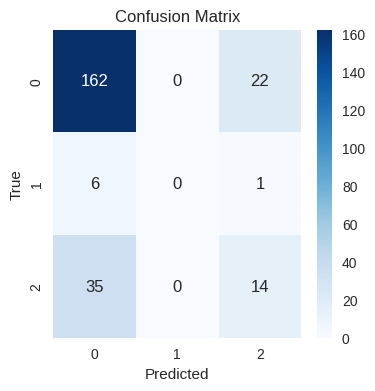


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       184
           1       0.00      0.00      0.00         7
           2       0.38      0.29      0.33        49

    accuracy                           0.73       240
   macro avg       0.39      0.39      0.39       240
weighted avg       0.69      0.73      0.71       240


Model Support Vector Machine
Cross Validation accuracy:  0.7418902705061081
Test Accuracy:  0.7541666666666667
Mean Squared Error: 0.8958333333333334
Root Mean Squared Error: 0.9464847243000456
Symmetric Mean Absolute Percentage Error: 87.37373737373738

Confusion Matrix:


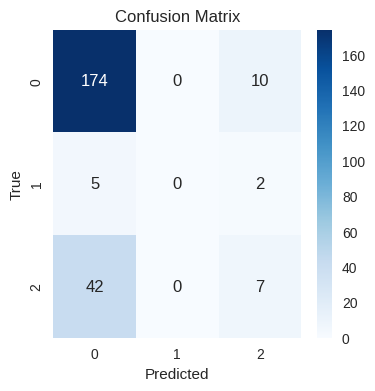


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.95      0.86       184
           1       0.00      0.00      0.00         7
           2       0.37      0.14      0.21        49

    accuracy                           0.75       240
   macro avg       0.39      0.36      0.36       240
weighted avg       0.68      0.75      0.70       240


Model Naive Bayes Classifier
Cross Validation accuracy:  0.7324880017452007
Test Accuracy:  0.7666666666666667
Mean Squared Error: 0.8333333333333334
Root Mean Squared Error: 0.9128709291752769
Symmetric Mean Absolute Percentage Error: 96.55172413793103

Confusion Matrix:


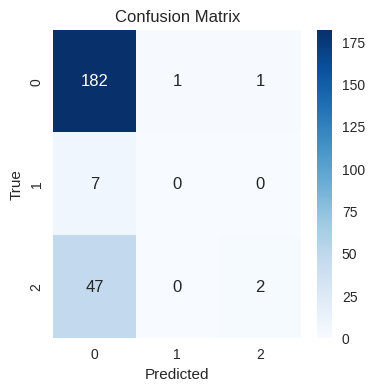


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.99      0.87       184
           1       0.00      0.00      0.00         7
           2       0.67      0.04      0.08        49

    accuracy                           0.77       240
   macro avg       0.48      0.34      0.31       240
weighted avg       0.73      0.77      0.68       240


Model Random Forest Classifier
Cross Validation accuracy:  0.8265597731239092
Test Accuracy:  0.8375
Mean Squared Error: 0.575
Root Mean Squared Error: 0.758287544405155
Symmetric Mean Absolute Percentage Error: 51.388888888888886

Confusion Matrix:


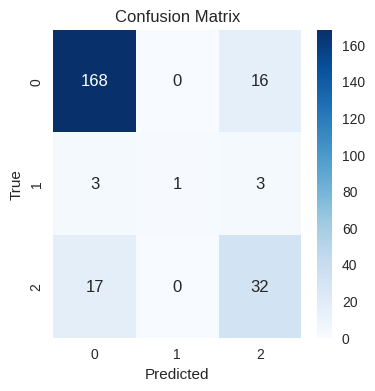


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       184
           1       1.00      0.14      0.25         7
           2       0.63      0.65      0.64        49

    accuracy                           0.84       240
   macro avg       0.84      0.57      0.60       240
weighted avg       0.84      0.84      0.83       240


Model Decision Tree Classifier
Cross Validation accuracy:  0.790014179755672
Test Accuracy:  0.7958333333333333
Mean Squared Error: 0.7166666666666667
Root Mean Squared Error: 0.8465616732800196
Symmetric Mean Absolute Percentage Error: 59.307359307359306

Confusion Matrix:


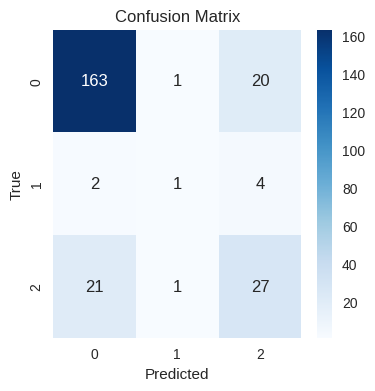


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       184
           1       0.33      0.14      0.20         7
           2       0.53      0.55      0.54        49

    accuracy                           0.80       240
   macro avg       0.58      0.53      0.54       240
weighted avg       0.79      0.80      0.79       240


Model Logistic Regression
Cross Validation accuracy:  0.7303992146596858
Test Accuracy:  0.8
Mean Squared Error: 0.7125
Root Mean Squared Error: 0.8440971508067067
Symmetric Mean Absolute Percentage Error: 69.65174129353234

Confusion Matrix:


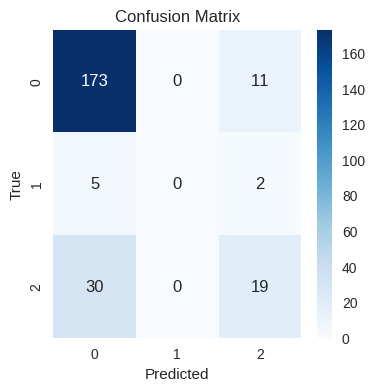


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       184
           1       0.00      0.00      0.00         7
           2       0.59      0.39      0.47        49

    accuracy                           0.80       240
   macro avg       0.48      0.44      0.45       240
weighted avg       0.76      0.80      0.77       240


Model Multilayer Perceptron
Cross Validation accuracy:  0.728310427574171
Test Accuracy:  0.7666666666666667
Mean Squared Error: 0.8458333333333333
Root Mean Squared Error: 0.9196919774214263
Symmetric Mean Absolute Percentage Error: 100.0

Confusion Matrix:


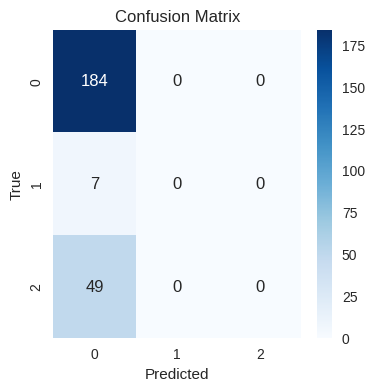


Classification Report:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       184
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00        49

    accuracy                           0.77       240
   macro avg       0.26      0.33      0.29       240
weighted avg       0.59      0.77      0.67       240


Best Model:  Pipeline(steps=[('model',
                 RandomForestClassifier(max_depth=10, random_state=42))])
                      Model  Cross Validation Accuracy  Test Accuracy  \
0     KNeighbors Classifier                   0.753403       0.733333   
1    Support Vector Machine                   0.741890       0.754167   
2    Naive Bayes Classifier                   0.732488       0.766667   
3  Random Forest Classifier                   0.826560       0.837500   
4  Decision Tree Classifier                   0.790014       0.795833   
5       Logistic Regression                

In [42]:
results2 = []

models = [
    ('KNeighbors Classifier', KNeighborsClassifier(n_neighbors=9)),
    ('Support Vector Machine', SVC(random_state=42,C=1,gamma=0.1)),
    ('Naive Bayes Classifier', GaussianNB(var_smoothing=1e-06)),
    ('Random Forest Classifier', RandomForestClassifier(random_state=42,max_depth=10,n_estimators=100)),
    ('Decision Tree Classifier', DecisionTreeClassifier(random_state=42,max_depth=10,min_samples_split=10)),
    ('Logistic Regression', LogisticRegression(random_state=42,C=100)),
    ('Multilayer Perceptron', MLPClassifier(random_state=42,activation='tanh',hidden_layer_sizes=(100,)))


]

best_model = None
best_accuracy = 0.0

#Iterate over the models and evaluate their performance
for name, model in models:
    #create a pipeline for each model
    pipeline = Pipeline([
        ('model', model)
    ])

    # perform cross validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)

    # Calculate mean accuracy
    mean_accuracy = scores.mean()

    #fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # make prediction on the test data
    y_pred = pipeline.predict(X_test)

    #Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

     #calculate MSE
    mse = mean_squared_error(y_test, y_pred)

    #calculate RSME
    rmse = np.sqrt(mse)

    #calculate SMAPE
    smape = np.mean(np.abs(y_test - y_pred) / (np.abs(y_test) + np.abs(y_pred))) * 100

    results2.append([name, mean_accuracy, accuracy, rmse, smape])

    #print the performance metrics
    print("Model", name)
    print("Cross Validation accuracy: ", mean_accuracy)
    print("Test Accuracy: ", accuracy)
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)
    print("Symmetric Mean Absolute Percentage Error:", smape)
    print()

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    print()

    classification_rep = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(classification_rep)
    print()

    if accuracy > best_accuracy:
      best_accuracy = accuracy
      best_model = pipeline



# Retrieve the best model
print("Best Model: ", best_model)

df_results2 = pd.DataFrame(results2, columns=['Model', 'Cross Validation Accuracy', 'Test Accuracy', 'Root Mean Squared Error', 'Symmetric Mean Absolute Percentage Error'])
print(df_results2)

In [43]:
df2.head()

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,productivity_category
0,0,1,3,8,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725,0
1,0,0,3,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500,0
2,0,1,3,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,0
3,0,1,3,12,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,0
4,0,1,3,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382,0


In [44]:
from imblearn.over_sampling import SMOTE
print("Before SMOTE: ",y.value_counts())
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
print("After SMOTE: ",y_smote.value_counts())

Before SMOTE:  productivity_category
0    881
2    277
1     39
Name: count, dtype: int64
After SMOTE:  productivity_category
0    881
2    881
1    881
Name: count, dtype: int64


In [45]:
scaler = StandardScaler()
X_smote = scaler.fit_transform(X_smote)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

Model KNeighbors Classifier
Cross Validation accuracy:  0.7961144163221403
Test Accuracy:  0.8034026465028355
Mean Squared Error: 0.46880907372400754
Root Mean Squared Error: 0.6846963368705923
Symmetric Mean Absolute Percentage Error: 20.34739454094293

Confusion Matrix:


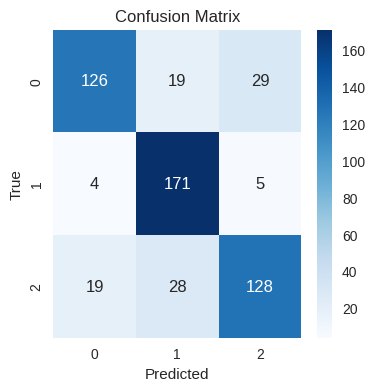


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       174
           1       0.78      0.95      0.86       180
           2       0.79      0.73      0.76       175

    accuracy                           0.80       529
   macro avg       0.81      0.80      0.80       529
weighted avg       0.81      0.80      0.80       529


Model Support Vector Machine
Cross Validation accuracy:  0.7857035617850381
Test Accuracy:  0.7693761814744802
Mean Squared Error: 0.48582230623818523
Root Mean Squared Error: 0.6970095452991911
Symmetric Mean Absolute Percentage Error: 21.166666666666664

Confusion Matrix:


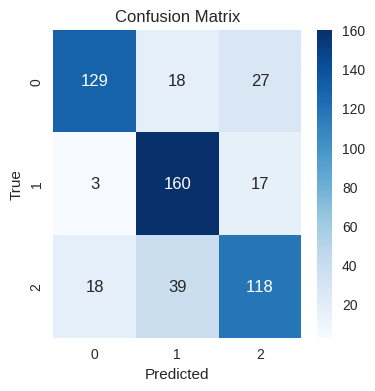


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.74      0.80       174
           1       0.74      0.89      0.81       180
           2       0.73      0.67      0.70       175

    accuracy                           0.77       529
   macro avg       0.78      0.77      0.77       529
weighted avg       0.77      0.77      0.77       529


Model Naive Bayes Classifier
Cross Validation accuracy:  0.5662341882065588
Test Accuracy:  0.5897920604914934
Mean Squared Error: 0.5406427221172023
Root Mean Squared Error: 0.7352841097951202
Symmetric Mean Absolute Percentage Error: 33.10077519379844

Confusion Matrix:


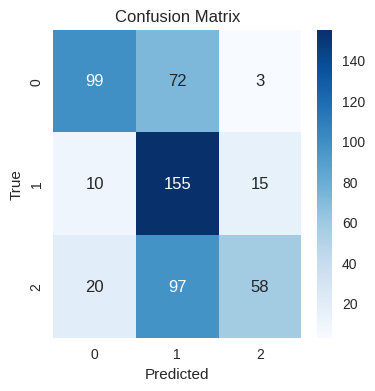


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.57      0.65       174
           1       0.48      0.86      0.62       180
           2       0.76      0.33      0.46       175

    accuracy                           0.59       529
   macro avg       0.67      0.59      0.58       529
weighted avg       0.67      0.59      0.58       529


Model Random Forest Classifier
Cross Validation accuracy:  0.8968718138325882
Test Accuracy:  0.9054820415879017
Mean Squared Error: 0.27599243856332706
Root Mean Squared Error: 0.5253498249388945
Symmetric Mean Absolute Percentage Error: 10.638297872340425

Confusion Matrix:


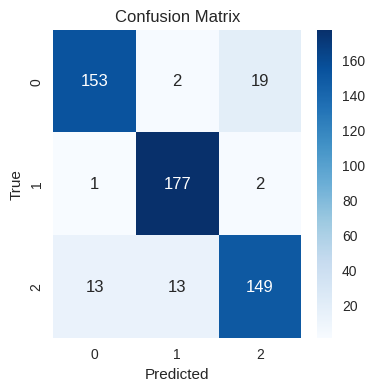


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       174
           1       0.92      0.98      0.95       180
           2       0.88      0.85      0.86       175

    accuracy                           0.91       529
   macro avg       0.90      0.90      0.90       529
weighted avg       0.90      0.91      0.90       529


Model Decision Tree Classifier
Cross Validation accuracy:  0.8391583476185674
Test Accuracy:  0.8506616257088847
Mean Squared Error: 0.3761814744801512
Root Mean Squared Error: 0.613336346941995
Symmetric Mean Absolute Percentage Error: 15.752828546562228

Confusion Matrix:


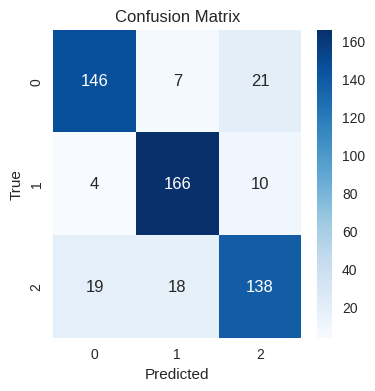


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       174
           1       0.87      0.92      0.89       180
           2       0.82      0.79      0.80       175

    accuracy                           0.85       529
   macro avg       0.85      0.85      0.85       529
weighted avg       0.85      0.85      0.85       529


Model Logistic Regression
Cross Validation accuracy:  0.6641278164319406
Test Accuracy:  0.6502835538752363
Mean Squared Error: 0.6049149338374291
Root Mean Squared Error: 0.7777627747825355
Symmetric Mean Absolute Percentage Error: 30.387205387205384

Confusion Matrix:


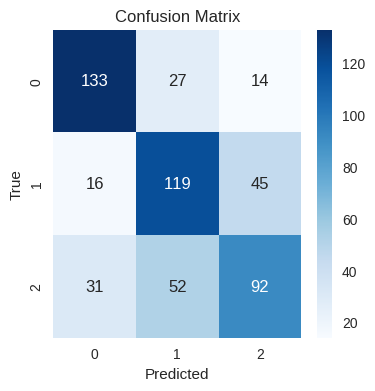


Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       174
           1       0.60      0.66      0.63       180
           2       0.61      0.53      0.56       175

    accuracy                           0.65       529
   macro avg       0.65      0.65      0.65       529
weighted avg       0.65      0.65      0.65       529


Model Multilayer Perceptron
Cross Validation accuracy:  0.8164498672313536
Test Accuracy:  0.8052930056710775
Mean Squared Error: 0.4839319470699433
Root Mean Squared Error: 0.6956521739130435
Symmetric Mean Absolute Percentage Error: 20.21996615905245

Confusion Matrix:


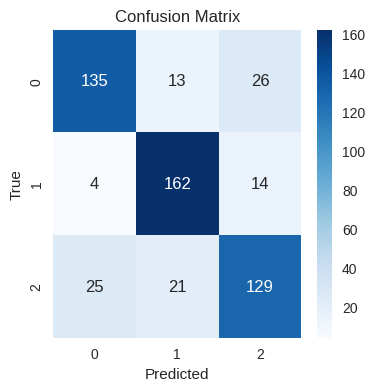


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       174
           1       0.83      0.90      0.86       180
           2       0.76      0.74      0.75       175

    accuracy                           0.81       529
   macro avg       0.80      0.80      0.80       529
weighted avg       0.80      0.81      0.80       529


Best Model:  Pipeline(steps=[('model', RandomForestClassifier(random_state=42))])
                      Model  Cross Validation Accuracy  Test Accuracy  \
0     KNeighbors Classifier                   0.796114       0.803403   
1    Support Vector Machine                   0.785704       0.769376   
2    Naive Bayes Classifier                   0.566234       0.589792   
3  Random Forest Classifier                   0.896872       0.905482   
4  Decision Tree Classifier                   0.839158       0.850662   
5       Logistic Regression                   0.664128       0.650284   
6

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

results3 = []

models = [
    ('KNeighbors Classifier', KNeighborsClassifier()),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Naive Bayes Classifier', GaussianNB()),
    ('Random Forest Classifier', RandomForestClassifier(random_state=42)),
    ('Decision Tree Classifier', DecisionTreeClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Multilayer Perceptron', MLPClassifier(random_state=42))


]

best_model = None
best_accuracy = 0.0

#Iterate over the models and evaluate their performance
for name, model in models:
    #create a pipeline for each model
    pipeline = Pipeline([
        ('model', model)
    ])

    # perform cross validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)

    # Calculate mean accuracy
    mean_accuracy = scores.mean()

    #fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # make prediction on the test data
    y_pred = pipeline.predict(X_test)

    #Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    #calculate MSE
    mse = mean_squared_error(y_test, y_pred)

    #calculate RSME
    rmse = np.sqrt(mse)

    #calculate SMAPE
    smape = np.mean(np.abs(y_test - y_pred) / (np.abs(y_test) + np.abs(y_pred))) * 100

    results3.append([name, mean_accuracy, accuracy, rmse, smape])

    #print the performance metrics
    print("Model", name)
    print("Cross Validation accuracy: ", mean_accuracy)
    print("Test Accuracy: ", accuracy)
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)
    print("Symmetric Mean Absolute Percentage Error:", smape)
    print()

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    print()

    classification_rep = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(classification_rep)
    print()

    #Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline



# Retrieve the best model
print("Best Model: ", best_model)

df_results3 = pd.DataFrame(results3, columns=['Model', 'Cross Validation Accuracy', 'Test Accuracy', 'Root Mean Squared Error', 'Symmetric Mean Absolute Percentage Error'])
print(df_results3)

In [48]:
def hyperparameter_tuning(X, y, models):
    # Define dictionary to store results
    results = {}

    # Perform hyperparameter tuning for each model
    for model_name, model in models.items():
    # Define parameter grid for hyperparameter tuning
        param_grid = {}
        if model_name == 'KNN':
          param_grid = {'n_neighbors': [3, 5, 7, 9]}
        elif model_name == 'NB':
          param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}
        elif model_name == 'SVM':
          param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100]}
        elif model_name == 'Random Forest':
          param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30]}
        elif model_name == 'Decision Tree':
          param_grid = {'max_depth': [10, 20, 30], 'min_samples_split': [2, 5, 10]}
        elif model_name == 'Logistic Regression':
          param_grid = {'C': [0.1, 1, 10, 100]}
        elif model_name == 'Multilayer Perceptron':
          param_grid = {'hidden_layer_sizes': [(100,), (50, 50), (100, 100)], 'activation': ['relu', 'tanh']}


        # Perform hyperparameter tuning using GridSearchCV
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
        grid_search.fit(X_train, y_train)

        # Get best hyperparameters and evaluate on test set
        best_params = grid_search.best_params_
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        # Store results in dictionary
        results[model_name] = {'best_params': best_params, 'accuracy': accuracy}

    return results

In [49]:
# Define models dictionary
models = {
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "NB": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Multilayer Perceptron": MLPClassifier()
}

# Example usage:
results = hyperparameter_tuning(X_train, y_train, models)
for model_name, result in results.items():
    print("Model:", model_name)
    print("Best hyperparameters:", result['best_params'])
    print("Accuracy:", result['accuracy'])
    print()

Model: KNN
Best hyperparameters: {'n_neighbors': 3}
Accuracy: 0.8128544423440454

Model: SVM
Best hyperparameters: {'C': 100, 'gamma': 1}
Accuracy: 0.8355387523629489

Model: NB
Best hyperparameters: {'var_smoothing': 1e-09}
Accuracy: 0.5897920604914934

Model: Random Forest
Best hyperparameters: {'max_depth': 30, 'n_estimators': 300}
Accuracy: 0.8960302457466919

Model: Decision Tree
Best hyperparameters: {'max_depth': 30, 'min_samples_split': 2}
Accuracy: 0.8506616257088847

Model: Logistic Regression
Best hyperparameters: {'C': 0.1}
Accuracy: 0.6502835538752363

Model: Multilayer Perceptron
Best hyperparameters: {'activation': 'relu', 'hidden_layer_sizes': (100, 100)}
Accuracy: 0.8393194706994329



Model KNeighbors Classifier
Cross Validation accuracy:  0.8060502167994354
Test Accuracy:  0.8128544423440454
Mean Squared Error: 0.46502835538752363
Root Mean Squared Error: 0.6819298757112227
Symmetric Mean Absolute Percentage Error: 19.56339210747271

Confusion Matrix:


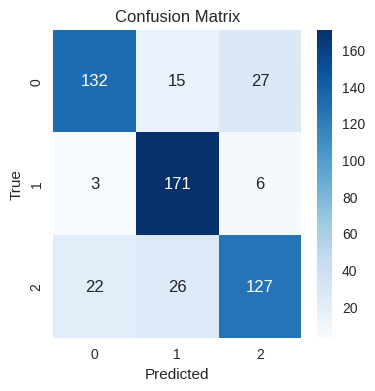


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.76      0.80       174
           1       0.81      0.95      0.87       180
           2       0.79      0.73      0.76       175

    accuracy                           0.81       529
   macro avg       0.81      0.81      0.81       529
weighted avg       0.81      0.81      0.81       529


Model Support Vector Machine
Cross Validation accuracy:  0.8334935520374666
Test Accuracy:  0.8355387523629489
Mean Squared Error: 0.4820415879017013
Root Mean Squared Error: 0.6942921488117961
Symmetric Mean Absolute Percentage Error: 20.466321243523318

Confusion Matrix:


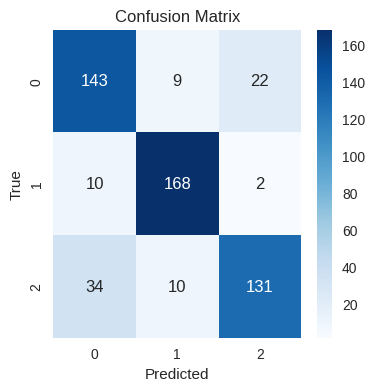


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       174
           1       0.90      0.93      0.92       180
           2       0.85      0.75      0.79       175

    accuracy                           0.84       529
   macro avg       0.84      0.83      0.83       529
weighted avg       0.84      0.84      0.83       529


Model Naive Bayes Classifier
Cross Validation accuracy:  0.5662341882065588
Test Accuracy:  0.5897920604914934
Mean Squared Error: 0.5406427221172023
Root Mean Squared Error: 0.7352841097951202
Symmetric Mean Absolute Percentage Error: 33.10077519379844

Confusion Matrix:


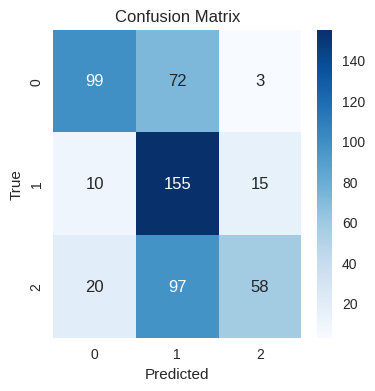


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.57      0.65       174
           1       0.48      0.86      0.62       180
           2       0.76      0.33      0.46       175

    accuracy                           0.59       529
   macro avg       0.67      0.59      0.58       529
weighted avg       0.67      0.59      0.58       529


Model Random Forest Classifier
Cross Validation accuracy:  0.9001882289670935
Test Accuracy:  0.9073724007561437
Mean Squared Error: 0.2627599243856333
Root Mean Squared Error: 0.5126011357631128
Symmetric Mean Absolute Percentage Error: 10.4

Confusion Matrix:


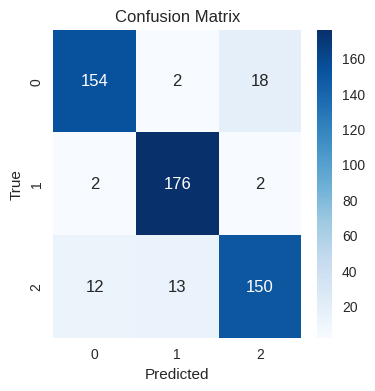


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       174
           1       0.92      0.98      0.95       180
           2       0.88      0.86      0.87       175

    accuracy                           0.91       529
   macro avg       0.91      0.91      0.91       529
weighted avg       0.91      0.91      0.91       529


Model Decision Tree Classifier
Cross Validation accuracy:  0.8391583476185674
Test Accuracy:  0.8506616257088847
Mean Squared Error: 0.3761814744801512
Root Mean Squared Error: 0.613336346941995
Symmetric Mean Absolute Percentage Error: 15.752828546562228

Confusion Matrix:


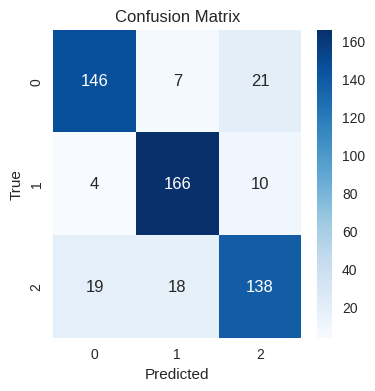


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       174
           1       0.87      0.92      0.89       180
           2       0.82      0.79      0.80       175

    accuracy                           0.85       529
   macro avg       0.85      0.85      0.85       529
weighted avg       0.85      0.85      0.85       529


Model Logistic Regression
Cross Validation accuracy:  0.6650779245515557
Test Accuracy:  0.6502835538752363
Mean Squared Error: 0.610586011342155
Root Mean Squared Error: 0.7814000328526708
Symmetric Mean Absolute Percentage Error: 30.464135021097043

Confusion Matrix:


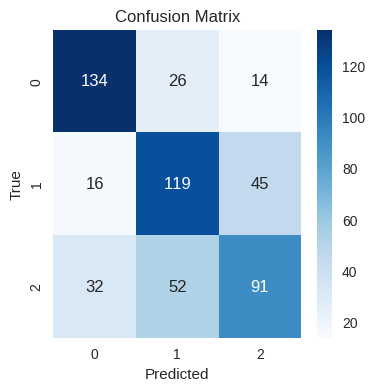


Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.77      0.75       174
           1       0.60      0.66      0.63       180
           2       0.61      0.52      0.56       175

    accuracy                           0.65       529
   macro avg       0.65      0.65      0.65       529
weighted avg       0.65      0.65      0.65       529


Model Multilayer Perceptron
Cross Validation accuracy:  0.8424669198794439
Test Accuracy:  0.8544423440453687
Mean Squared Error: 0.4064272211720227
Root Mean Squared Error: 0.6375164477658773
Symmetric Mean Absolute Percentage Error: 16.538131962296486

Confusion Matrix:


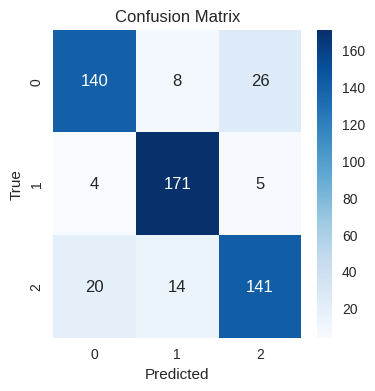


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.80      0.83       174
           1       0.89      0.95      0.92       180
           2       0.82      0.81      0.81       175

    accuracy                           0.85       529
   macro avg       0.85      0.85      0.85       529
weighted avg       0.85      0.85      0.85       529


Best Model:  Pipeline(steps=[('model',
                 RandomForestClassifier(max_depth=30, n_estimators=300,
                                        random_state=42))])
                      Model  Cross Validation Accuracy  Test Accuracy  \
0     KNeighbors Classifier                   0.806050       0.812854   
1    Support Vector Machine                   0.833494       0.835539   
2    Naive Bayes Classifier                   0.566234       0.589792   
3  Random Forest Classifier                   0.900188       0.907372   
4  Decision Tree Classifier                   0.839158    

In [50]:
final_rmse = {}
final_smape = {}
results4 = []

models = [
    ('KNeighbors Classifier', KNeighborsClassifier(n_neighbors=3)),
    ('Support Vector Machine', SVC(random_state=42,C=100,gamma=1)),
    ('Naive Bayes Classifier', GaussianNB(var_smoothing=1e-09)),
    ('Random Forest Classifier', RandomForestClassifier(random_state=42,max_depth=30,n_estimators=300)),
    ('Decision Tree Classifier', DecisionTreeClassifier(random_state=42,max_depth=30,min_samples_split=2)),
    ('Logistic Regression', LogisticRegression(random_state=42,C=0.1)),
    ('Multilayer Perceptron', MLPClassifier(random_state=42,activation='relu',hidden_layer_sizes=(100,100)))


]

best_model = None
best_accuracy = 0.0

#Iterate over the models and evaluate their performance
for name, model in models:
    #create a pipeline for each model
    pipeline = Pipeline([
        ('model', model)
    ])

    # perform cross validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)

    # Calculate mean accuracy
    mean_accuracy = scores.mean()

    #fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # make prediction on the test data
    y_pred = pipeline.predict(X_test)

    #Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

     #calculate MSE
    mse = mean_squared_error(y_test, y_pred)

    #calculate RSME
    rmse = np.sqrt(mse)
    final_rmse[name] = rmse

    #calculate SMAPE
    smape = np.mean(np.abs(y_test - y_pred) / (np.abs(y_test) + np.abs(y_pred))) * 100
    final_smape[name] = smape

    results4.append([name, mean_accuracy, accuracy, rmse, smape])

    #print the performance metrics
    print("Model", name)
    print("Cross Validation accuracy: ", mean_accuracy)
    print("Test Accuracy: ", accuracy)
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)
    print("Symmetric Mean Absolute Percentage Error:", smape)
    print()

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    print()

    classification_rep = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(classification_rep)
    print()

    if accuracy > best_accuracy:
      best_accuracy = accuracy
      best_model = pipeline

print("Best Model: ", best_model)

df_results4 = pd.DataFrame(results4, columns=['Model', 'Cross Validation Accuracy', 'Test Accuracy', 'Root Mean Squared Error', 'Symmetric Mean Absolute Percentage Error'])
print(df_results4)

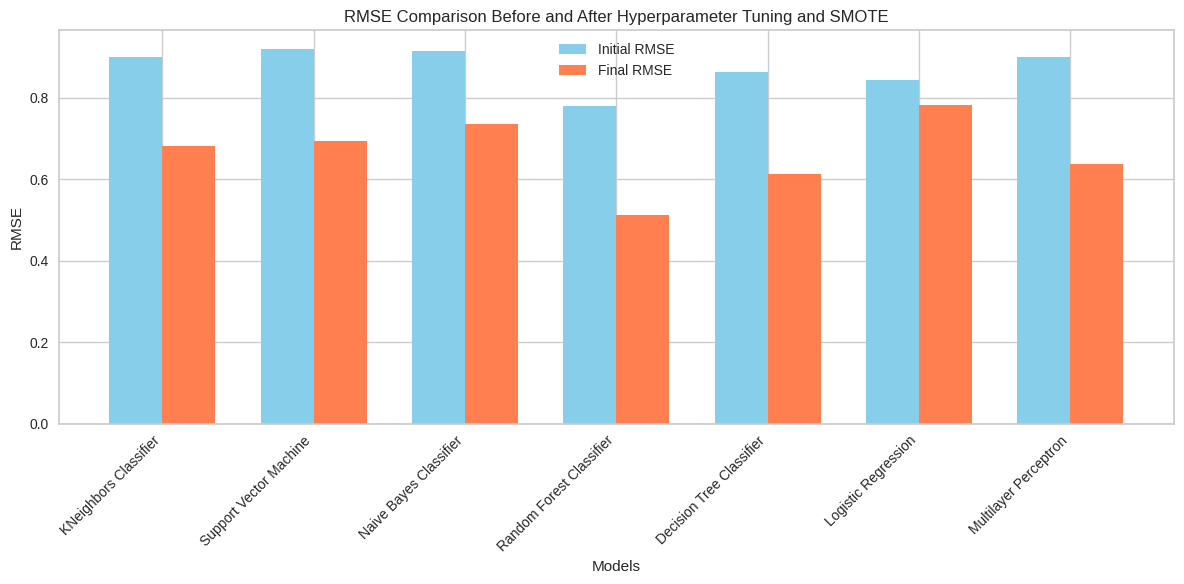

In [51]:
import matplotlib.pyplot as plt
import numpy as np

model_names = list(initial_rmse.keys())

initial_rmse_values = list(initial_rmse.values())
final_rmse_values = list(final_rmse.values())

bar_width = 0.35

index = np.arange(len(model_names))

plt.figure(figsize=(12, 6))
plt.bar(index, initial_rmse_values, bar_width, label='Initial RMSE', color='skyblue')
plt.bar(index + bar_width, final_rmse_values, bar_width, label='Final RMSE', color='coral')

plt.xlabel("Models")
plt.ylabel("RMSE")
plt.title("RMSE Comparison Before and After Hyperparameter Tuning and SMOTE")
plt.xticks(index + bar_width / 2, model_names, rotation=45, ha='right')
plt.legend()

plt.tight_layout()

plt.show()

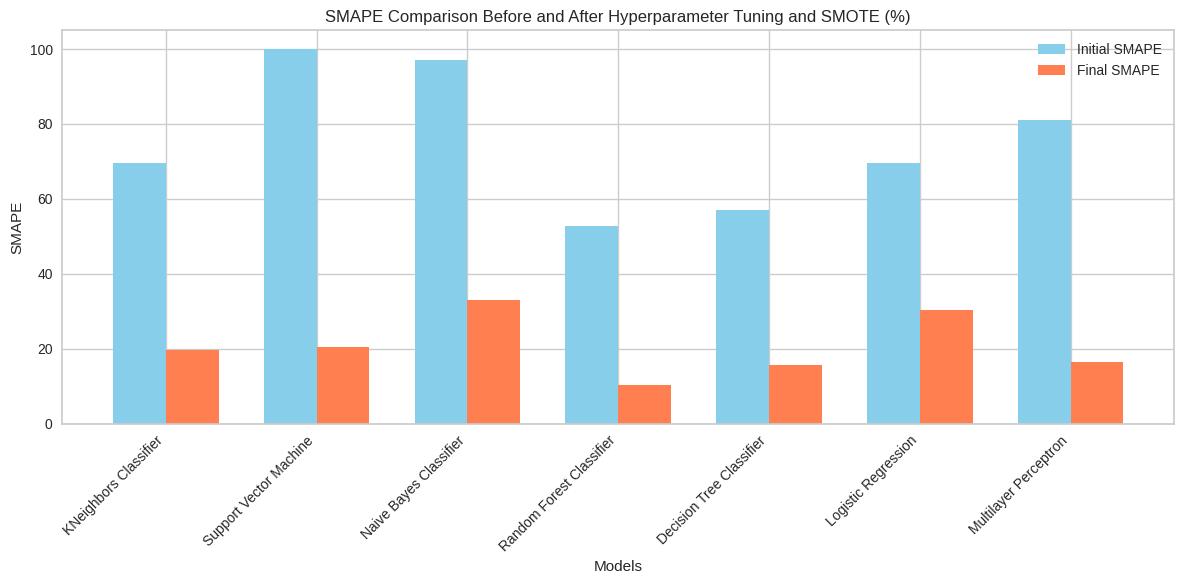

In [52]:
import matplotlib.pyplot as plt
import numpy as np

model_names = list(initial_smape.keys())

initial_smape_values = list(initial_smape.values())
final_smape_values = list(final_smape.values())

bar_width = 0.35

index = np.arange(len(model_names))

plt.figure(figsize=(12, 6))
plt.bar(index, initial_smape_values, bar_width, label='Initial SMAPE', color='skyblue')
plt.bar(index + bar_width, final_smape_values, bar_width, label='Final SMAPE', color='coral')

plt.xlabel("Models")
plt.ylabel("SMAPE")
plt.title("SMAPE Comparison Before and After Hyperparameter Tuning and SMOTE (%)")
plt.xticks(index + bar_width / 2, model_names, rotation=45, ha='right')
plt.legend()

plt.tight_layout()

plt.show()

Text(0, 0.5, 'Features')

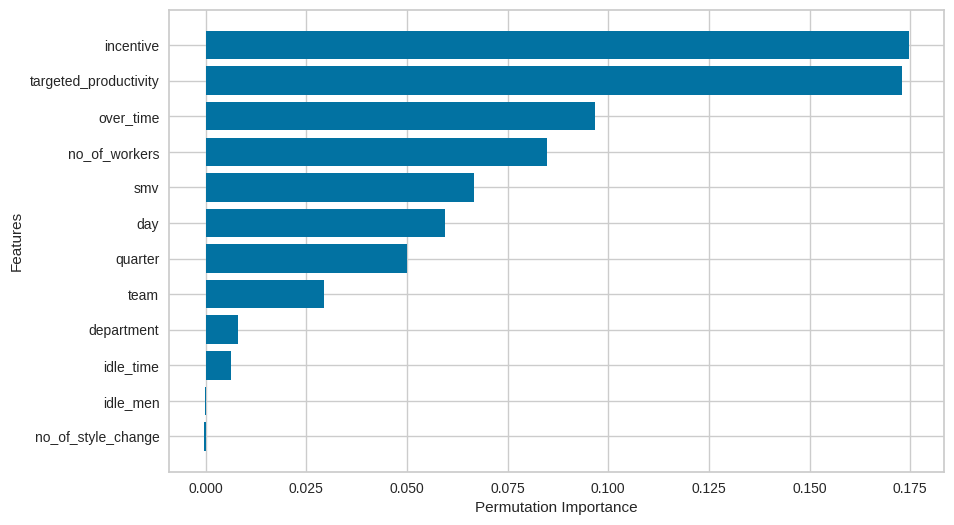

In [53]:
from sklearn.inspection import permutation_importance

result = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42)

feature_names = df2.drop(columns=['productivity_category','actual_productivity']).columns
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(np.array(feature_names)[sorted_idx], result.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.ylabel("Features")

## Save Model

In [54]:
import pickle

with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

In [55]:
with open('best_model.pkl', 'rb') as file:
    saved_model = pickle.load(file)

new_data = pd.read_csv('/content/drive/MyDrive/garments_new.csv')
new_data

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,500.0,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
5,1/2/2015,Quarter1,sewing,Friday,8,0.85,27.00,1120.0,7200,110,0.0,0,1,60.0,0.950000
6,1/2/2015,Quarter1,finishing,Friday,2,0.78,4.10,600.0,950,0,0.0,0,0,9.0,0.875000
7,1/2/2015,Quarter1,sewing,Friday,10,0.83,12.00,970.0,3700,55,0.0,0,0,32.0,0.820000
8,1/2/2015,Quarter1,sewing,Friday,14,0.79,11.50,965.0,3600,45,0.0,0,0,31.5,0.810000
9,1/2/2015,Quarter1,sewing,Friday,7,0.81,26.00,1165.0,1900,48,0.0,0,0,57.0,0.805000


In [56]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   20 non-null     object 
 1   quarter                20 non-null     object 
 2   department             20 non-null     object 
 3   day                    20 non-null     object 
 4   team                   20 non-null     int64  
 5   targeted_productivity  20 non-null     float64
 6   smv                    20 non-null     float64
 7   wip                    20 non-null     float64
 8   over_time              20 non-null     int64  
 9   incentive              20 non-null     int64  
 10  idle_time              20 non-null     float64
 11  idle_men               20 non-null     int64  
 12  no_of_style_change     20 non-null     int64  
 13  no_of_workers          20 non-null     float64
 14  actual_productivity    20 non-null     float64
dtypes: float

In [57]:
new_data.drop(columns=['date','wip'], inplace=True)

In [58]:
new_data['productivity_category'] = new_data['actual_productivity'].apply(categorize_productivity)


In [59]:
le= LabelEncoder()
new_data["department"] = le.fit_transform(new_data["department"])
new_data["quarter"] = le.fit_transform(new_data["quarter"])
new_data["day"] = le.fit_transform(new_data["day"])
new_data["productivity_category"] = le.fit_transform(new_data["productivity_category"])

In [60]:
new_data

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,productivity_category
0,0,1,3,8,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725,0
1,0,0,3,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500,0
2,0,1,3,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,0
3,0,1,3,12,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,0
4,0,1,3,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382,0
5,0,1,0,8,0.85,27.00,7200,110,0.0,0,1,60.0,0.950000,0
6,0,0,0,2,0.78,4.10,950,0,0.0,0,0,9.0,0.875000,0
7,0,1,0,10,0.83,12.00,3700,55,0.0,0,0,32.0,0.820000,0
8,0,1,0,14,0.79,11.50,3600,45,0.0,0,0,31.5,0.810000,0
9,0,1,0,7,0.81,26.00,1900,48,0.0,0,0,57.0,0.805000,0


In [61]:
X_new = new_data.drop(columns=['actual_productivity','productivity_category'])
y_new = new_data['actual_productivity']

In [62]:
scaler = StandardScaler()
X_new = scaler.fit_transform(X_new)

In [64]:
predictions = saved_model.predict(X_new)
print(predictions)

[2 1 2 2 2 0 1 2 1 2 0 1 2 1 2 0 1 2 2 2]
